## Activity_3.1.1

**STUDENT_NAME** - Srikrishna U N  <br>
**STUDENT_USN** - 1RVU22CSE162

## Detail Description of the Activity Task:

**Understanding and Implementing Simple Linear Regression for Life Satisfaction Prediction**

**Objective**: To apply linear regression to model the relationship between GDP per capita and life satisfaction, and analyze the results.

**Data:** A dataset containing pairs of GDP per capita (x) and life satisfaction (y) for various countries.

**Dataset Link:** https://drive.google.com/drive/folders/1hjxmKtifhQ3TE8caTZdbBh4XwfwMLJMk?usp=sharing


**Tasks:**

- Load the data into your preferred programming environment (e.g., Python).
- Check for missing values and handle them appropriately (e.g., imputation, removal).
- Perform Feature Scaling*
- Explore the data visually (histograms, scatter plots) to understand its distribution and potential relationships.[ Optional ]

- Implement the linear regression model:

                       - Define the hypothesis function:  (ŷ = weight.x + intercept) in your chosen language.
                       - Calculate the loss - Implement the Mean Squared Error (MSE) cost function.

[ Future task - Not today !! ] - Choose an optimization algorithm (e.g., gradient descent) to minimize the MSE with respect to the parameters θ₀ and θ₁.


**Designed by team:** Ashwini M, Dr. Shabbeer B, Dr. Shobana P, Ms Achala H and Ms Shanti K

In [19]:
#Imports [matplotlib.pyplot, pandas]
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# load the dataset using pandas
happy_df = pd.read_csv("datasets/happiness.csv")
happy_df

,Entity,Code,Year,Life_Satisfaction,GDP_per_capita,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2022,1.8590,NaN,NaN,NaN
2,Afghanistan,AFG,2021,2.4038,1516.3057,40099460.0,NaN
3,Afghanistan,AFG,2020,2.5229,1968.3410,38972236.0,NaN
4,Afghanistan,AFG,2019,2.5669,2079.9219,37769496.0,NaN
...,...,...,...,...,...,...,...
58697,Zimbabwe,ZWE,1985,NaN,NaN,8690516.0,NaN
58698,Zimbabwe,ZWE,1986,NaN,NaN,8983048.0,NaN
58699,Zimbabwe,ZWE,1987,NaN,NaN,9277484.0,NaN
58700,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0,NaN


In [4]:
#Print the total null values
happy_df.isna().sum().sum()

171939

In [13]:
#Drop all the null values from table
happy_df.dropna(inplace=True)
happy_df

,Entity,Code,Year,Life_Satisfaction,GDP_per_capita,Population (historical estimates),Continent
8,Afghanistan,AFG,2015,3.360,2108.7140,33753500.0,Asia
604,Albania,ALB,2015,4.655,11880.5980,2882482.0,Europe
864,Algeria,DZA,2015,6.355,11751.6340,39543148.0,Africa
1492,Angola,AGO,2015,3.866,7967.1040,28127724.0,Africa
2140,Argentina,ARG,2015,6.650,23933.8870,43257064.0,South America
...,...,...,...,...,...,...,...
55852,Uruguay,URY,2015,6.545,22486.4280,3402820.0,South America
56112,Uzbekistan,UZB,2015,5.987,6401.1150,30949416.0,Asia
57083,Vietnam,VNM,2015,5.061,8091.0903,92191400.0,Asia
58188,Zambia,ZMB,2015,4.795,3365.3792,16248231.0,Africa


In [14]:
# Extract independent and dependent variables [Hint: Take 2 columns for study: Life_Satisfaction and GDP_per_capita ]
y = happy_df['Life_Satisfaction']
X =  happy_df['GDP_per_capita']
X,y

(8         2108.7140
 604      11880.5980
 864      11751.6340
 1492      7967.1040
 2140     23933.8870
             ...    
 55852    22486.4280
 56112     6401.1150
 57083     8091.0903
 58188     3365.3792
 58449     2313.8787
 Name: GDP_per_capita, Length: 150, dtype: float64,
 8        3.360
 604      4.655
 864      6.355
 1492     3.866
 2140     6.650
          ...  
 55852    6.545
 56112    5.987
 57083    5.061
 58188    4.795
 58449    4.193
 Name: Life_Satisfaction, Length: 150, dtype: float64)

In [16]:
#Using decribe function print the five point summary and also mention the inference comes from this.
happy_df.describe()

,Year,Life_Satisfaction,GDP_per_capita,Population (historical estimates)
count,150.0,150.000000,150.000000,1.500000e+02
mean,2015.0,5.407247,21038.805725,4.804445e+07
std,0.0,1.132179,20984.633609,1.606863e+08
min,2015.0,2.905000,781.579300,3.310680e+05
25%,2015.0,4.426000,5158.971625,4.625688e+06
50%,2015.0,5.351500,12709.224500,1.076690e+07
75%,2015.0,6.310250,30530.392750,3.546920e+07
max,2015.0,7.526000,113182.730000,1.393715e+09


## Inferences
1. min and max  - Gives the minimum and maximum value for each numerical column
2. mean - Gives the average of each numerical column
3. 50% - gives the median
Here since median significantly differs from the mean it implies that the data is skewed

<Axes: >

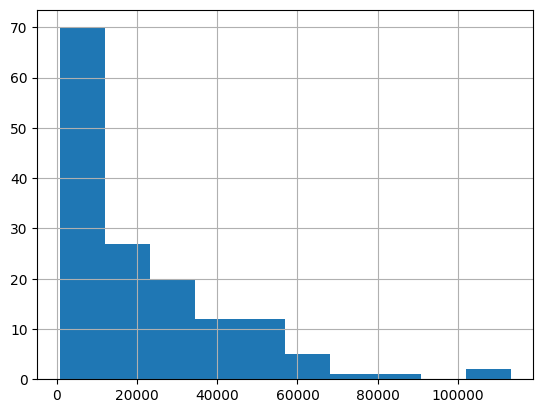

In [27]:
#Visualization chart for the study of distribution of x and y variables. [hint - x.hist() and plt.show()]
X.hist()

<Axes: >

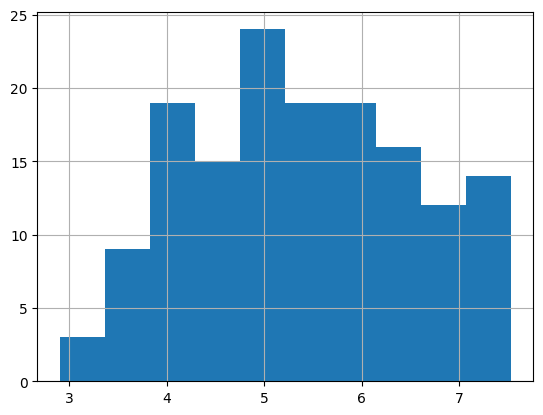

In [28]:
y.hist()

[edit the cell and write your answer here]

01. Distribution of x is positive skewed, no skewed or negative skewed
02. Distribution of y is positive skewed, no skewed or negative skewed

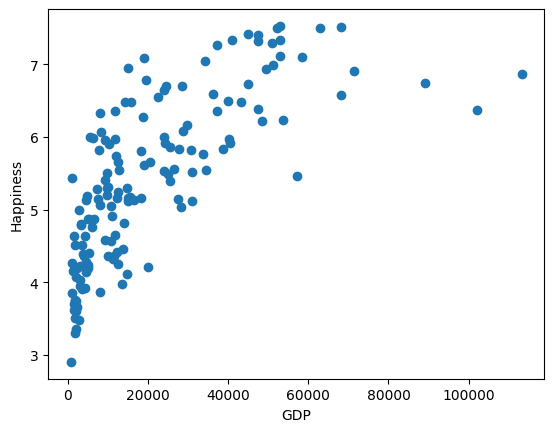

In [17]:
#Visualization chart with proper labels for the study of relationship between x and y variables. [hint - plt.scatter(x,y) and plt.show()]
plt.scatter(X,y)
plt.xlabel("GDP")
plt.ylabel("Happiness")
plt.show()


01. x,y is showing positive correlation or negative correlation.
ANS <b>Positive correlation</b>

In [71]:
#Simple linear model
def LinearReg(x,w,b):
    return (w*x)+b
def MSE(y,y_pred):
    return np.mean((y-y_pred)**2)

In [72]:
#Setting the intial parameter [initial guess w = 0 and b = 0]
X,y = np.array(X),np.array(y)
w = 0
b = 0

In [89]:
# Calculate prediction and loss (very important hint:using pandas DataFrame)
y_preds = LinearReg(X,w,b)
loss = MSE(y,y_preds)
loss

30.5115997

### Optional: What will be the parameter w and b for getting minimumm loss/error.

Answer: w=0.0002,b=-3.1

In [91]:
y_pred = LinearReg(X,0.0002,-3.1)
MSE(y,y_pred)

30.387108103423706

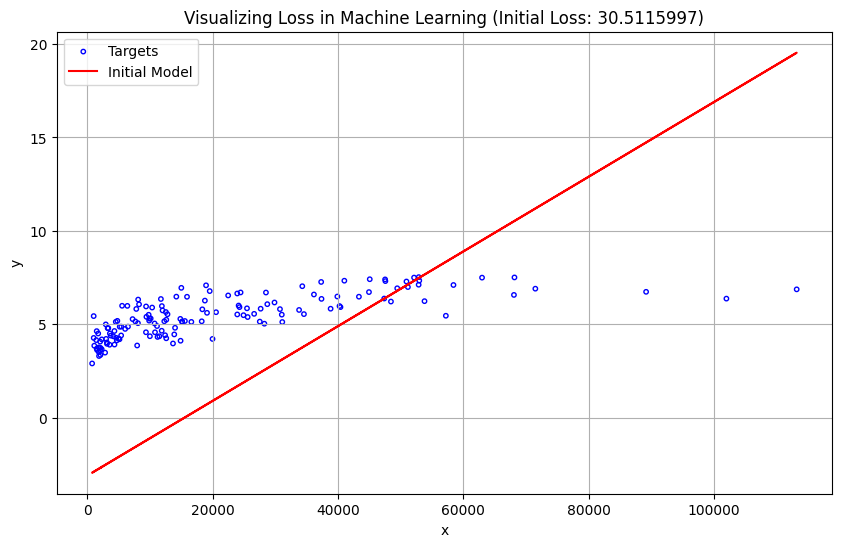

In [92]:
# Create the visualization
data = happy_df
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot data points as circles
plt.scatter(data['GDP_per_capita'],data['Life_Satisfaction'], label="Targets", s=10, facecolors='none', edgecolors='blue')

# Plot model line
plt.plot(data['GDP_per_capita'], y_pred, label="Initial Model", color='red')

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Visualizing Loss in Machine Learning (Initial Loss: {})".format(loss))

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

#Rate this assignment [edit this markdown cell]

Easy, medium or difficult
Also give exta comments for experience and improvising in future for add more levels.